In [14]:
import numpy as np
import pandas as pd
from lestpy import lbm_model as lbm
import seaborn as sns

In [2]:
chemin = r"C:\Users\TTfr\Documents\Python\Analyses DOE - MD\desactivation\res_couple.xlsx"
df = pd.read_excel(chemin, decimal=',')
df.drop([0], inplace=True)

In [3]:
df

,temperature,time,C3,PR1
1,71,8,0.053600,0.057583
2,29,22,0.407067,0.151550
3,71,22,0.055633,0.058767
4,50,15,0.461617,0.176117
5,20,15,0.501617,0.189767
6,80,15,0.420642,0.063450
7,50,5,0.525150,0.194350
8,50,25,0.510217,0.243600


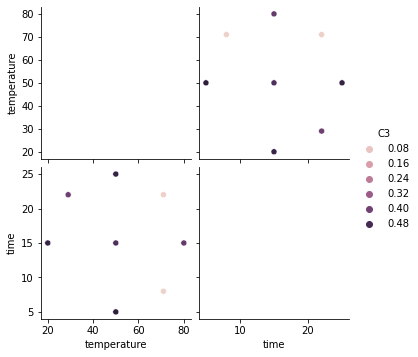

In [26]:
sns.pairplot(df[['temperature', 'time', 'C3']], hue='C3')

In [31]:
y = df[['C3', 'PR1']]
X = df[['temperature', 'time']]
y

,C3,PR1
1,0.053600,0.057583
2,0.407067,0.151550
3,0.055633,0.058767
4,0.461617,0.176117
5,0.501617,0.189767
6,0.420642,0.063450
7,0.525150,0.194350
8,0.510217,0.243600


In [32]:
model = lbm.LBM_Regression()

In [37]:
model.transform(X, y, interaction_list='quadratic', allow_autointeraction=True)

method = variable instant
calculated in 0.032 seconds


In [42]:
model.rescaled_features = model.rescaled_features[['time',	'temperature x temperature',	'temperature x time',	'time x time']]
model.rescaled_features

,time,temperature x temperature,temperature x time,time x time
0,-0.455983,-0.047654,-0.571080,0.181551
1,0.354654,0.181551,-0.571080,-0.047654
2,0.354654,-0.047654,0.613383,-0.047654
3,-0.050665,-0.391461,0.105756,-0.391461
4,-0.050665,0.707787,0.226619,-0.391461
5,-0.050665,0.380351,-0.015108,-0.391461
6,-0.629691,-0.391461,0.226619,0.707787
7,0.528362,-0.391461,-0.015108,0.380351


In [43]:
model.fit(X,y, threshold=0.05)

summary of the model for C3:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     2.844
Date:                Tue, 14 Jun 2022   Prob (F-statistic):              0.143
Time:                        21:48:15   Log-Likelihood:                 3.7226
No. Observations:                   8   AIC:                            -3.445
Df Residuals:                       6   BIC:                            -3.286
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    -0.005

c:\Users\TTfr\AppData\Local\Programs\Python\Python39-32\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\TTfr\AppData\Local\Programs\Python\Python39-32\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
